<a href="https://colab.research.google.com/github/ak-bling/MNIST-Handwritten-Digit-Classification/blob/main/DL_Project_2_MINIST_Digit_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Classification using Deep Learning (Neural Network)**

Importing Dependencies

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

**Loading the MNIST Datafrom keras.dataset**

In [ ]:
(X_train,Y_train),(X_test,Y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
# shape of the numpy arrays
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


training data = 10,000 images

test data = 6,000 images


image dimension ---- 28 x 28
means Grayscale --- 1 channel



In [ ]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


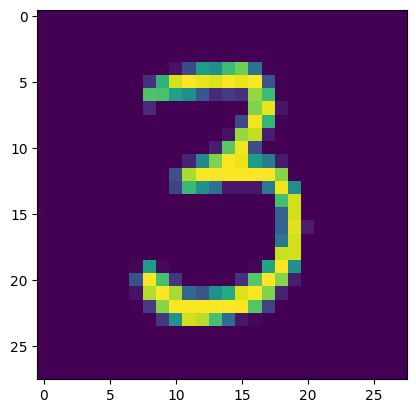

2


In [ ]:
# displaying the image

plt.imshow(X_train[50])
plt.show()

# print the corresponding label
print(Y_train[25])

**Image Labels**

In [ ]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [ ]:
# unique values in Y_train
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding

All the images have the same dimensions in this dataset, if not, we have to resize all the images to a common dimensions

In [ ]:
# scaling the values

X_train=X_train/255
X_test=X_test/255

In [ ]:
# pritnting the 10th image
print (X_train[10])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Building Neural Network**

In [ ]:
# setting up the alyers of the neural network

model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),       # (28,28,3) if RGB
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')     # 10---because the total classifications are 10===0,1,2,3,4,5,6,7,8,9
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling the neural network

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# training the Neural Network

model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8486 - loss: 0.5226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9568 - loss: 0.1451
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9690 - loss: 0.1018
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9766 - loss: 0.0780
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9813 - loss: 0.0630
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0517
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9878 - loss: 0.0436
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9891 - loss: 0.0376
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9897 - loss: 0.0339
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9907 - loss: 0.0305


Training Data Accuracy = 99.07%

---



**Acuracy on Test Data**

In [ ]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9711 - loss: 0.1172
0.9739999771118164


Test Data Accuracy = 97.11%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


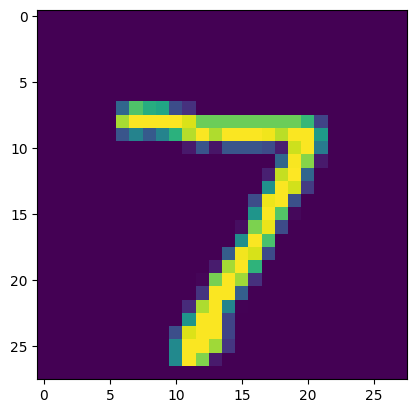

In [ ]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(Y_test[0])

7


In [ ]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[2.5022653e-05 2.9564957e-05 3.0070042e-02 7.7117729e-01 2.2930813e-06
 1.2947237e-06 6.4946541e-11 9.9999934e-01 2.6790012e-04 4.3856198e-01]


model.predict()---gives the prediction probability of each class for that data point

In [ ]:
# converting the prediction probabilities to class label

label_for_first_image = np.argmax(Y_pred[0])
print(label_for_first_image)

7


In [ ]:
# converting the prediction probabilities to class label for all data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(6), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test = True Labels

Y_pred_labels =  Predicted Labels



Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [ ]:
print(conf_mat)

tf.Tensor(
[[ 961    0    3    1    2    2    3    2    2    4]
 [   0 1120    3    1    1    2    3    2    3    0]
 [   2    1  995   12    2    1    1    8    9    1]
 [   0    0    0  995    1    4    0    1    4    5]
 [   0    0    0    0  963    0    6    5    0    8]
 [   1    0    0   16    1  861    7    0    4    2]
 [   1    1    2    1    7    4  940    1    1    0]
 [   1    2    8   10    0    0    0  990    4   13]
 [   3    0    3   12    2    5    3    2  940    4]
 [   2    2    0    5   14    2    0    5    4  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Label')

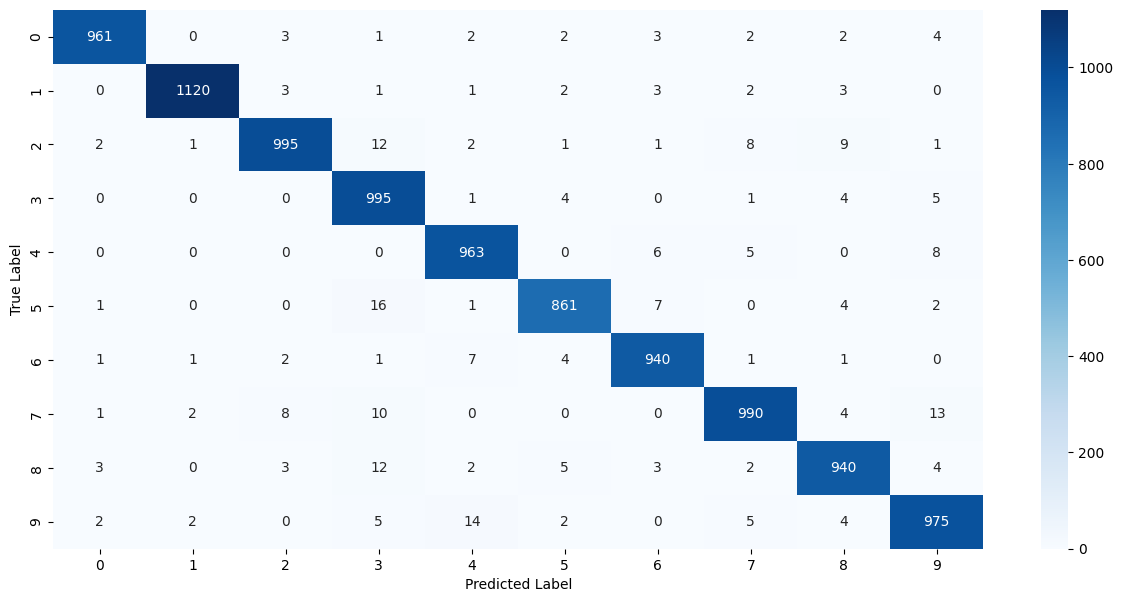

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot =True, fmt='d',cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

**Building a Predictive Sytem**

In [ ]:
input_image_path = '/content/mnist.png'

input_image = cv2.imread(input_image_path)

In [ ]:
type(input_image)

numpy.ndarray

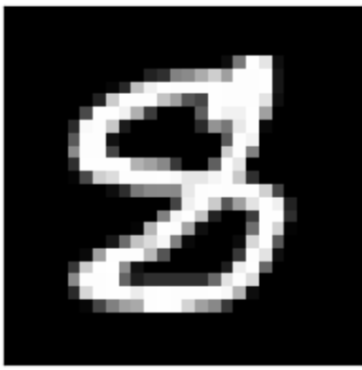

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape   #result was RGB Image

(370, 362, 3)

In [ ]:
# converting the image into grayscale

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [ ]:
grayscale.shape

(370, 362)

In [ ]:
# resizing the image into 28 x 28
input_image_resize = cv2.resize(grayscale, (28,28))

In [ ]:
input_image_resize.shape

(28, 28)

In [ ]:
cv2_imshow(input_image_resize)

In [ ]:
# dividing the imae also into 255 same procedure on the previous
input_image_resize=input_image_resize/255

In [ ]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])    # 1-means one image, 28,28--means the dimensions

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[1.7162169e-05 1.5012682e-06 8.3247788e-04 8.5051864e-01 3.5444253e-07
  9.7706664e-01 1.6720123e-04 1.4089158e-06 9.9996859e-01 3.2958168e-01]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

8


Predictive Sytem (just summary of the codes)
**bold text**


Path of the Image to be Predicted: /content/mnist.png


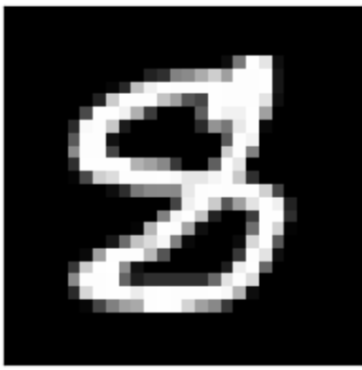

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
The Handwritten Digit is Recognized as 8


In [ ]:
input_image_path = input('Path of the Image to be Predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize=input_image_resize/255

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is Recognized as', input_pred_label)
